In [1]:
## librerias

import numpy as np 
import pandas as pd 
import yellowbrick
from yellowbrick.text import FreqDistVisualizer


# sklearn 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA


# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

###
import logging

from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import re
from pandas import pivot

%matplotlib inline

# SARIMA: modeling and forescasting 

<html>
<head>
<title></title>
</head>
<body>

<h2>ARIMA</h2>
ARIMA stands for AutoRegressive Integrated Moving Average. 

<p>  <u><b>AR (Autoregression):</b></u> A model that uses the dependent relationship between an observation and some number of lagged observations. p is a parameter of how many lagged observations to be taken in.</p><br />
<p> <u><b>I (Integrated):</b></u> A model that uses the differencing of raw observations (e.g. subtracting an observation from the previous time step). Differencing in statistics is a transformation applied to time-series data in order to make it stationary. This allows the properties do not depend on the time of observation, eliminating trend and seasonality and stabilizing the mean of the time series. </p><br />
<p><u><b>MA (Moving Average):</b></u> A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. q is a parameter of how many lagged observations to be taken in. Contrary to the AR model, the finite MA model is always stationary.</p><br />
<p>
Parameters of the ARIMA model</p><br />
<p><b>p (lag order):</b> number of lag observations included in the model<br />
<b>d (degree of differencing):</b> number of times that the raw observations are differenced<br />
<b>q (order of moving average):</b> size of the moving average window</p><br />
ARIMA models with python<br />
<p></p>
<p></p>

<h3>Time Series: Check Stationarity</h3>

<p><b>Stationary Time Series:</b>data does not have any upward or downward trend or seasonal effects. Mean or variance are consistent over time</p><br />
<b>Non-Stationary Time Series:</b> data show trends, seasonal effects, and other structures depend on time. Forecasting performance is dependent on the time of observation. Mean and variance change over time and a drift in the model is captured.</p><br />
<p><b><u>Checks for Stationarity</u></b><br /></p>
<b>Look at Plots:</b> plot a run sequence plot to see anything with an obvious trend or seasonal effects. Look at Plots #1, run sequence plot obviously shows an upward trend as time goes by. We can also observe seasonal trends from similar shape in each year. <br />
<b>Summary Statistics:</b> partition your data into intervals and check for obvious or significant differences in summary statistics. Look at Plots #2, if the data is stationary the summary statistics should be consistent over time. The mean should be consistent with a consistent variance indicating a Gaussian distribution. The histogram does not show Gaussian distribution and another indication of non-stationary time series data.</b><br />
<b>Statistical Test:</b> use statistical tests if the expectations of stationarity are met or violated</b><br />

<h3>Cross-Validation for Time Series</h3>
https://towardsdatascience.com/time-series-machine-learning-regression-framework-9ea33929009a
<p>Cross-validation for time series is different from machine-learning problems that time or sequence is not involved. In the case of the absence of time, we select a random subset of data as a validation set to estimate the accuracy of the measurement. In time series, we often predict a value in the future. Therefore, the validation data always has to occur after the training data. There are two schemas sliding-window and Forward Chaining validation methods, that can be used for the time series CV.</p>
   <u> </u><b> </b><br /><p></p>


</p>
<u></u>
</body>
</html>

### Uploading data

In [2]:
data_temperatures = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Temperaturas_Medianas_mensuales_del_aire_de_la_cuidad_Barcelona_desde_1780/temperaturesbarcelonadesde1780_format_long.csv')
data_rainfalls = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Precipitaciones acumuladas mensuales de la ciudad de Barcelona_desde_1786_Ciudad_servicios_Medio_ambiente/precipitacionsbarcelonadesde1786_format_long.csv')



In [3]:
print('Training data shape Temperatures: ', data_temperatures.shape)
print('Training data shape Temperatures: ', data_rainfalls.shape)

Training data shape Temperatures:  (2880, 4)
Training data shape Temperatures:  (2808, 4)


## Exploratory Analysis

#### Indexing data by date


In [4]:
data_temperatures['dateInt']=data_temperatures['Any'].astype(str) + data_temperatures['Mes'].astype(str).str.zfill(2)

data_temperatures['fecha'] = pd.to_datetime(data_temperatures['dateInt'], format='%Y%m')

data_temperatures=data_temperatures.drop(['dateInt'], axis=1)

data_temperatures.head(5)
index_data = data_temperatures.set_index('fecha')
index_data

,Any,Mes,Desc_Mes,Temperatura
fecha,,,,
1780-01-01,1780,1,Gener,6.7
1780-02-01,1780,2,Febrer,7.3
1780-03-01,1780,3,Març,11.6
1780-04-01,1780,4,Abril,11.4
1780-05-01,1780,5,Maig,16.3
1780-06-01,1780,6,Juny,19.1
1780-07-01,1780,7,Juliol,21.4
1780-08-01,1780,8,Agost,22.0
1780-09-01,1780,9,Setembre,20.3


### Seasonality

Repeating spikes are evidence of significant seasonality. If we try to graph the month over month changes, we get a similar plot. Again, we see the same approximate sequence over and over again. For futher information visit https://github.com/AlexOlarthe/Temperature-Increase-Barcelona/blob/master/Data%20Exploratory%20Analysis/Temperature_Raising.ipynb 

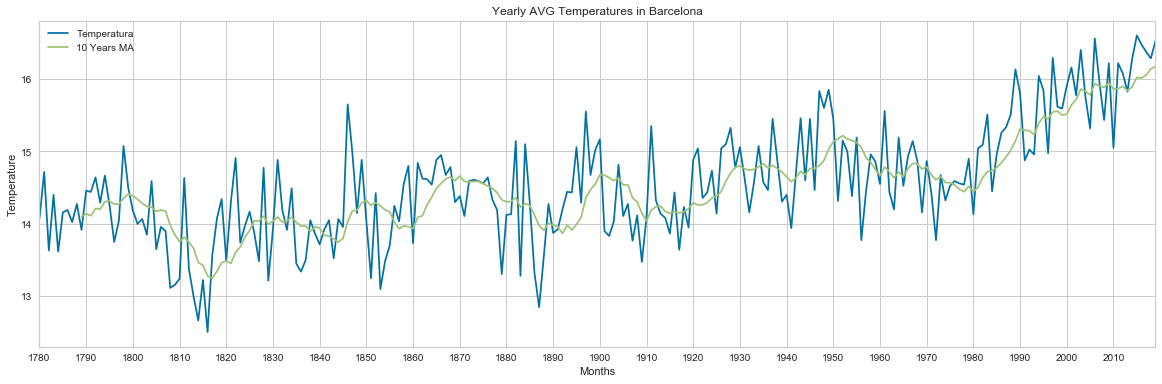

In [5]:
year_avg_t = pd.pivot_table(index_data, values='Temperatura', index='Any', aggfunc='mean')
year_avg_t['10 Years MA'] = year_avg_t['Temperatura'].rolling(10).mean()
year_avg_t[['Temperatura','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in Barcelona')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1780,2019,10)])

plt.show()



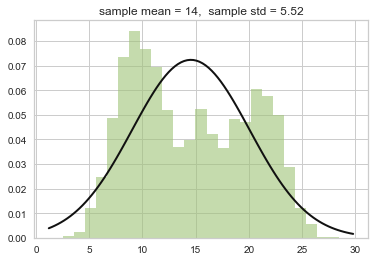

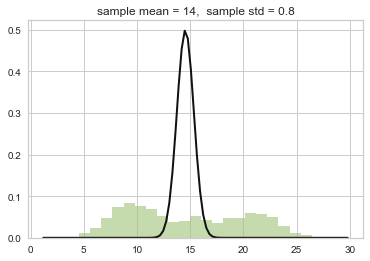

In [6]:
## gaussian distribution
##year_avg_t
##df_result
#### Por mes
from scipy.stats import norm
mu, std = norm.fit(index_data.Temperatura)
plt.hist(index_data.Temperatura, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('sample mean = {},  sample std = {}'.format(int(round(mu, 2)), round(std, 2)))
plt.show()

########
## por año
mu, std = norm.fit(year_avg_t.Temperatura)
plt.hist(index_data.Temperatura, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('sample mean = {},  sample std = {}'.format(int(round(mu, 2)), round(std, 2)))
plt.show()

In [7]:
#### por año
X_0 = year_avg_t.Temperatura
result_log_0 = adfuller(np.log(X_0))
print('ADF Statistic: %f' % result_log_0[0])
print('p-value: %f' % result_log_0[1])
print('Critical Values:')
for key, value in result_log_0[4].items():
    print('\t%s: %.3f' % (key, value))

## por mes
X_1 = index_data.Temperatura
result_log_1 = adfuller(np.log(X_1))
print('ADF Statistic: %f' % result_log_1[0])
print('p-value: %f' % result_log_1[1])
print('Critical Values:')
for key, value in result_log_1[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.579853
p-value: 0.493706
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573
ADF Statistic: -4.681485
p-value: 0.000091
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


### Por mes es estacional, pero por año no lo es

In [8]:
### Última comprobación de la estacionalidad por año (Atención: media de medias)

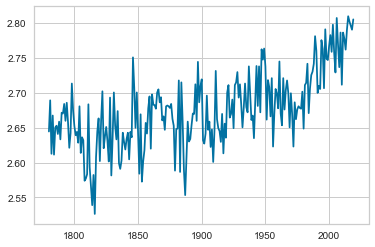

In [9]:
y_log=year_avg_t.Temperatura
df_log = np.log(y_log)
plt.plot(df_log)

<h2>CONCLUSIÓN</h2>

<h3>TS no estacionario</h3>

<p>  <u><b>La razón:</b></u> Usando el test estadístico "Augmented Dickey-Fuller", nos dice que si el ADF> que  CV(1%) y el p-value >0.005, los datos no son estacionarios. Para poder hacer ML en un Time Series debemos evitar los picos y datos que fluctian demasiado, con lo cual tenemos que reducir el ruido.</p><br />
<u><b>Utilizaré diferenciación para hacer mi modelo estacionario</b></u>

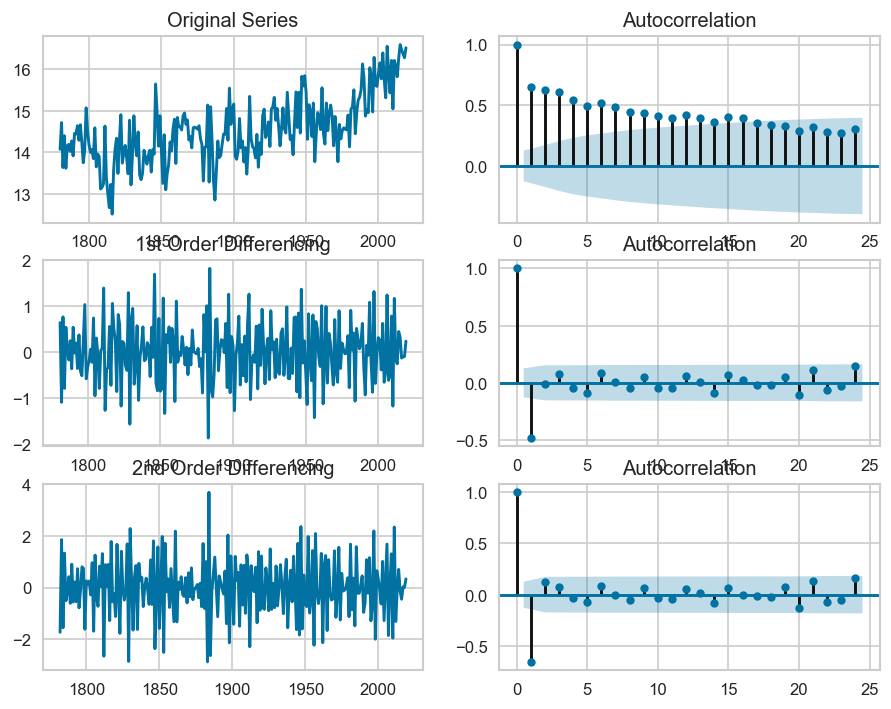

In [10]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data

## definición de d=?
# Original Series
fig, axes = plt.subplots(3, 2, sharex=False)
axes[0, 0].plot(year_avg_t.Temperatura); axes[0, 0].set_title('Original Series')
plot_acf(year_avg_t.Temperatura, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(year_avg_t.Temperatura.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(year_avg_t.Temperatura.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(year_avg_t.Temperatura.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(year_avg_t.Temperatura.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

the best parameter for d is d=1. The second one has more noise.

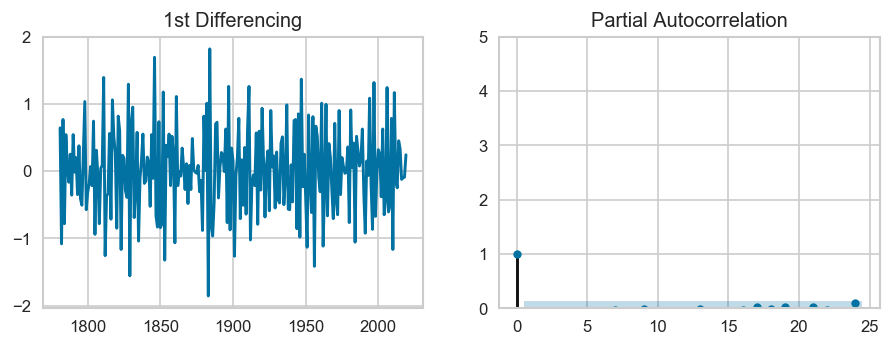

In [11]:
# valor de p=0
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(year_avg_t.Temperatura.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(year_avg_t.Temperatura.diff().dropna(), ax=axes[1])

plt.show()

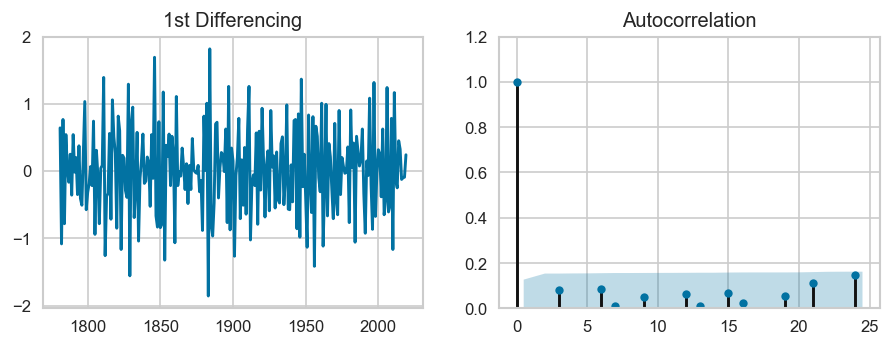

In [12]:
# valor de q=1
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data


fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(year_avg_t.Temperatura.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(year_avg_t.Temperatura.diff().dropna(), ax=axes[1])

plt.show()

### d,p,q=1,0,0 (based on me preliminar calculated values)

## SARIMA MODEL APPLY

In [13]:
from statsmodels.tsa.stattools import acf

# Create Training and Test 75/25
train = year_avg_t.Temperatura[:225]
test = year_avg_t.Temperatura[225:]

### Apply d,p,q=1,0,0

                             ARIMA Model Results                              
Dep. Variable:          D.Temperatura   No. Observations:                  239
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -207.379
Method:                       css-mle   S.D. of innovations              0.576
Date:                Sun, 04 Oct 2020   AIC                            420.759
Time:                        12:33:14   BIC                            431.188
Sample:                             1   HQIC                           424.962
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0091      0.025      0.361      0.719      -0.040       0.058
ar.L1.D.Temperatura    -0.4825      0.057     -8.532      0.000      -0.593      -0.372
                

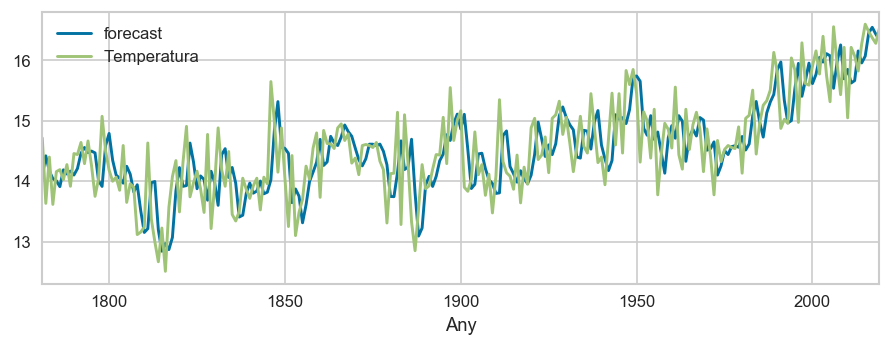

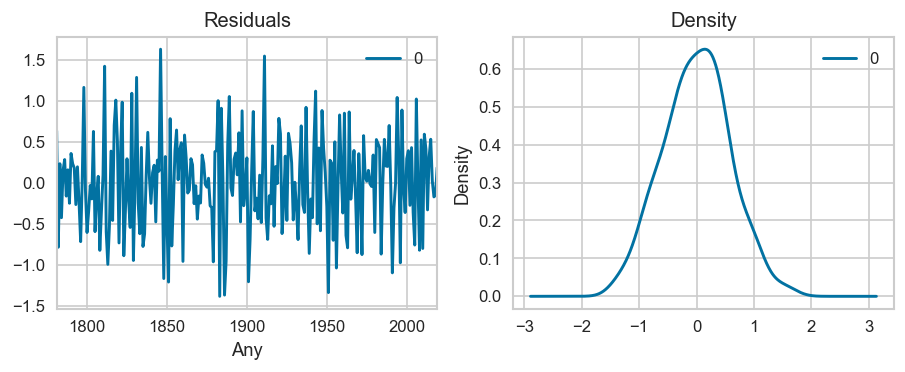

In [14]:
from statsmodels.tsa.arima_model import ARIMA

# 1,0,0 ARIMA Model
model_1 = ARIMA(year_avg_t.Temperatura, order=(1,1,0))
model_fit_1 = model_1.fit(disp=0)
print(model_fit_1.summary())
model_fit_1.plot_predict(dynamic=False)
## residual
residuals_1 = pd.DataFrame(model_fit_1.resid)
fig, ax = plt.subplots(1,2)
residuals_1.plot(title="Residuals", ax=ax[0])
residuals_1.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<h3>Accuracy Metrics</h3>


The commonly used accuracy metrics to judge forecasts are:

<p> <u><b>Mean Absolute Percentage Error (MAPE</b></u>)<br />
<u><b>Mean Error (ME)</b></u><br />
<u><b>Mean Absolute Error (MAE)</b></u><br />
<u><b>Mean Percentage Error (MPE)</b></u><br />
<u><b>Root Mean Squared Error (RMSE)</b></u><br />
<u><b>Lag 1 Autocorrelation of Error (ACF1)</b></u><br />
<u><b>Correlation between the Actual and the Forecast (corr)</b></u><br />
<u><b>Min-Max Error (minmax)</b></u></p><br />
Typically, if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.

<u><b>Why not use the other metrics?</b></u>

Because only the above three are percentage errors that vary between 0 and 1. That way, you can judge how good is the forecast irrespective of the scale of the series.

The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.
<p>  <u><b></b></u> </p><br />
<u><b></b></u>

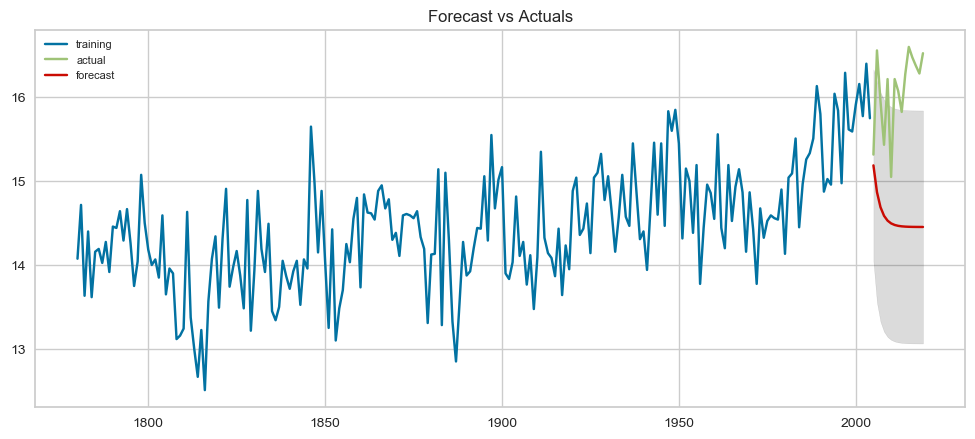

{'mape': 0.09314679329951904,
 'me': -1.5121824843068932,
 'mae': 1.5121824843068932,
 'mpe': -0.09314679329951904,
 'rmse': 1.6148207661663783,
 'acf1': 0.07621517540774035,
 'corr': -0.36358757058617575,
 'minmax': 0.09314679329951903}

In [15]:
# Build Model
# model = ARIMA(train, order=(1,1,0))  
model_0 = ARIMA(train, order=(1, 0, 0))  
fitted = model_0.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

### Apply q,d,p= 1,1,1

                             ARIMA Model Results                              
Dep. Variable:          D.Temperatura   No. Observations:                  239
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -188.144
Method:                       css-mle   S.D. of innovations              0.531
Date:                Sun, 04 Oct 2020   AIC                            384.288
Time:                        12:33:15   BIC                            398.194
Sample:                             1   HQIC                           389.892
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0092      0.008      1.175      0.241      -0.006       0.025
ar.L1.D.Temperatura     0.0595      0.103      0.576      0.565      -0.143       0.262
ma.L1.D.Temperat

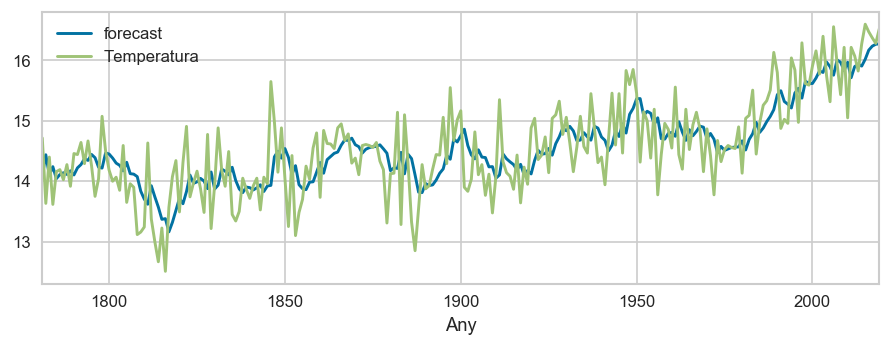

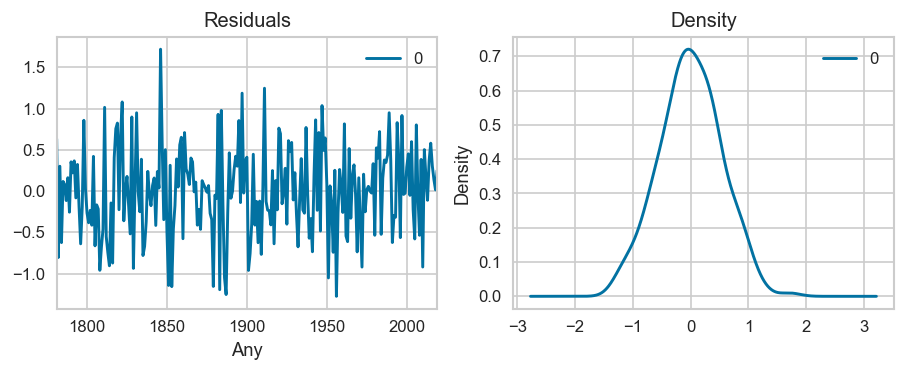

In [16]:
model_2 = ARIMA(year_avg_t.Temperatura, order=(1,1,1))
model_fit_2 = model_2.fit(disp=0)
print(model_fit_2.summary())
model_fit_2.plot_predict(dynamic=False)
## residual
residuals_2 = pd.DataFrame(model_fit_2.resid)
fig, ax = plt.subplots(1,2)
residuals_2.plot(title="Residuals", ax=ax[0])
residuals_2.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

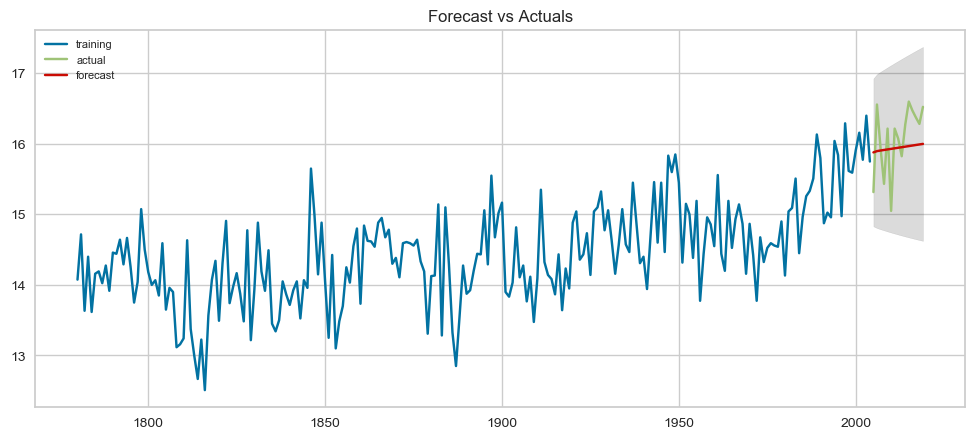

{'mape': 0.025447665956649806,
 'me': -0.13402658404099507,
 'mae': 0.407427250303598,
 'mpe': -0.007529526175209736,
 'rmse': 0.4631410230728227,
 'acf1': -0.11842033433758387,
 'corr': 0.5562923779413117,
 'minmax': 0.025078829093388877}

In [17]:
# Metrics
#   
model_1 = ARIMA(train, order=(1, 1, 1))  
fitted = model_1.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


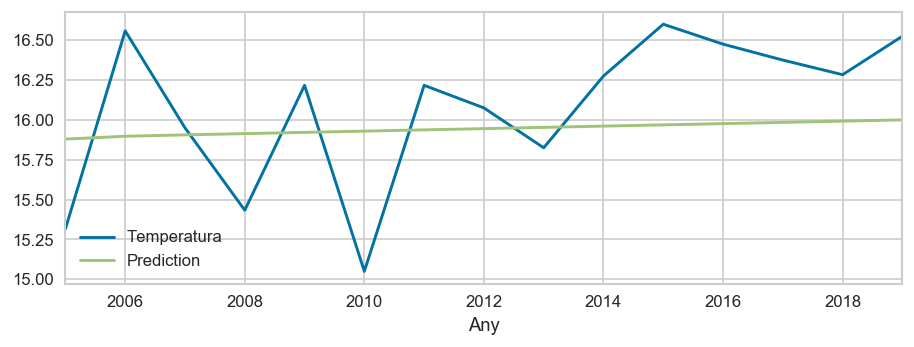

In [18]:
future_forecast = pd.DataFrame(fc,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

## SARIMA using auto_arima

In [19]:
import pmdarima as pm

In [20]:
model_auto_1 = pm.auto_arima(train, start_p=0, start_q=0,
                           test='adf',max_p=2, max_q=2, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True, n_jobs=-1, trend='t')

print(model_auto_1.aic())


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=452.841, BIC=459.664, Fit time=0.146 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=396.638, BIC=406.873, Fit time=0.096 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=364.708, BIC=374.943, Fit time=0.138 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=367.609, BIC=381.255, Fit time=0.145 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=365.642, BIC=379.288, Fit time=0.149 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=365.717, BIC=382.775, Fit time=0.387 seconds
Total fit time: 1.063 seconds
364.70810161022155


In [21]:
future_forecast = model_auto_1.predict(n_periods=15)
future_forecast

array([15.99311678, 16.01265542, 16.03228051, 16.05199206, 16.07179007,
       16.09167452, 16.11164544, 16.1317028 , 16.15184662, 16.1720769 ,
       16.19239362, 16.21279681, 16.23328644, 16.25386253, 16.27452508])

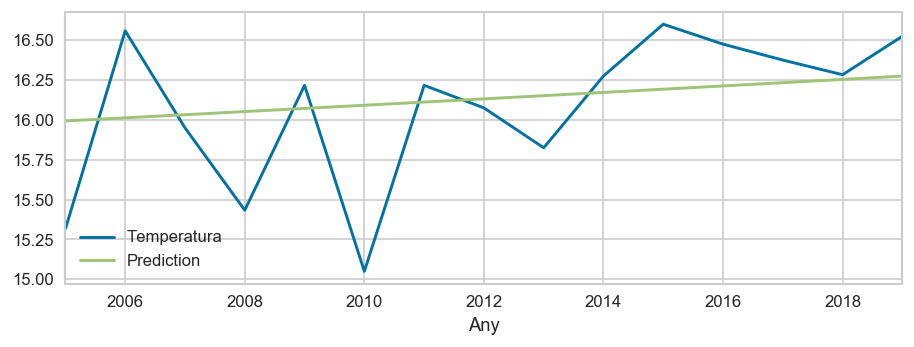

In [22]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()


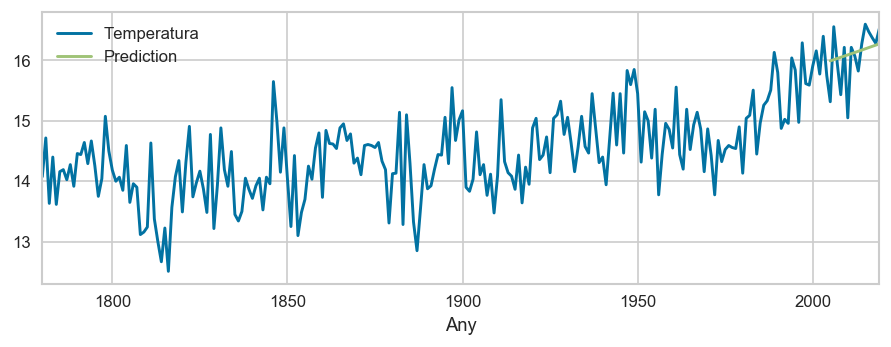

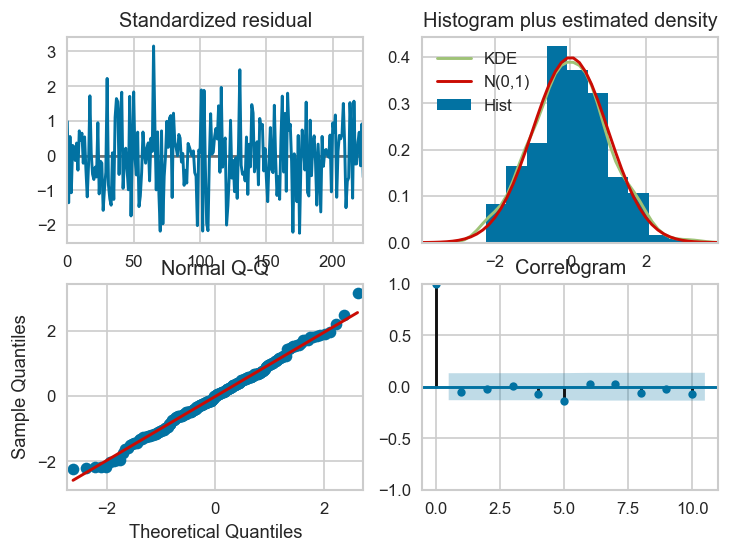

In [23]:
pd.concat([year_avg_t.Temperatura,future_forecast],axis=1).plot()
model_auto_1.plot_diagnostics(figsize=(7,5))
plt.show()

In [24]:
test=pd.concat([test,future_forecast],axis=1)
#test=test.drop(['Prediction'], axis=1)
test.head(15)

,Temperatura,Prediction
Any,,
2005,15.316667,15.993117
2006,16.558333,16.012655
2007,15.950000,16.032281
2008,15.433333,16.051992
2009,16.216667,16.071790
2010,15.050000,16.091675
2011,16.216667,16.111645
2012,16.075000,16.131703
2013,15.825000,16.151847


In [25]:
mape = np.mean(np.abs(test.Prediction - test.Temperatura)/np.abs(test.Temperatura))
me = np.mean(test.Prediction - test.Temperatura)
mae = np.mean(np.abs(test.Prediction - test.Temperatura))
mpe = np.mean((test.Prediction - test.Temperatura)/test.Temperatura) 
rmse = np.mean((test.Prediction - test.Temperatura)**2)**.5
corr = np.corrcoef(test.Prediction, test.Temperatura)[0,1]
mins = np.amin(np.hstack([test.Prediction[:,None], 
                              test.Temperatura[:,None]]), axis=1)
maxs = np.amax(np.hstack([test.Prediction[:,None], 
                              test.Temperatura[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)  
acf1 = acf(test.Prediction-test.Temperatura)[1]
print('Accuracy: \n')
print('Mean Absolute Percentage Error: \n',mape)
print('Mean Error: \n ',me )
print('Mean Absolute Error: \n:',mae)
print('Mean Percentage Error: \n',mpe)
print('Root Mean Squared Error: \n',rmse )
print('Correlation between the Actual and the Forecast: \n',corr)
print('minim: \n',mins)
print('max: \n',maxs)
print('MinMax: \n',minmax)
print('Lag 1 Autocorrelation of Error: \n', acf1)

Accuracy: 

Mean Absolute Percentage Error: 
 0.020238961063952374
Mean Error: 
  0.05417637346260389
Mean Absolute Error: 
: 0.31950540005451217
Mean Percentage Error: 
 0.0041349465987925325
Root Mean Squared Error: 
 0.42435691383786817
Correlation between the Actual and the Forecast: 
 0.5456068958066564
minim: 
 [15.31666667 16.01265542 15.95       15.43333333 16.07179007 15.05
 16.11164544 16.075      15.825      16.1720769  16.19239362 16.21279681
 16.23328644 16.25386253 16.27452508]
max: 
 [15.99311678 16.55833333 16.03228051 16.05199206 16.21666667 16.09167452
 16.21666667 16.1317028  16.15184662 16.275      16.6        16.475
 16.375      16.28333333 16.525     ]
MinMax: 
 0.019682277340904997
Lag 1 Autocorrelation of Error: 
 -0.21092559163023028


#### Once we decide which model is the best one we can create forecast until 2050

## forecast until 2050

In [26]:
index_def=['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029','2030','2031','2032'
       ,'2033','2034','2035','2036','2037','2038','2039','2040','2041','2042','2043','2044','2045','2046','2047','2048','2049','2050']

In [27]:
future_forecast_def = model_auto_1.predict(n_periods=31)
future_forecast_def

array([15.99311678, 16.01265542, 16.03228051, 16.05199206, 16.07179007,
       16.09167452, 16.11164544, 16.1317028 , 16.15184662, 16.1720769 ,
       16.19239362, 16.21279681, 16.23328644, 16.25386253, 16.27452508,
       16.29527408, 16.31610953, 16.33703144, 16.3580398 , 16.37913462,
       16.40031589, 16.42158361, 16.44293779, 16.46437842, 16.48590551,
       16.50751905, 16.52921904, 16.55100549, 16.57287839, 16.59483775,
       16.61688356])

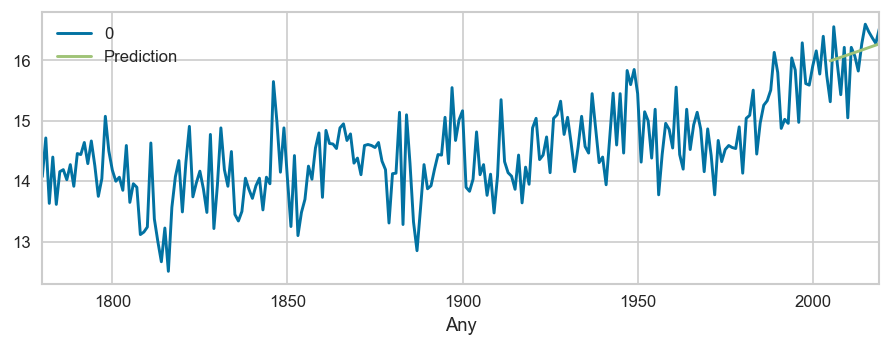

In [28]:
future_forecast_def = pd.DataFrame(future_forecast_def,index = index_def, columns=['Prediction'])
plot_0=pd.concat([year_avg_t.Temperatura,future_forecast],axis=0)

plot_0.plot()

In [29]:
future_forecast_def

,Prediction
2020,15.993117
2021,16.012655
2022,16.032281
2023,16.051992
2024,16.071790
2025,16.091675
2026,16.111645
2027,16.131703
2028,16.151847
2029,16.172077


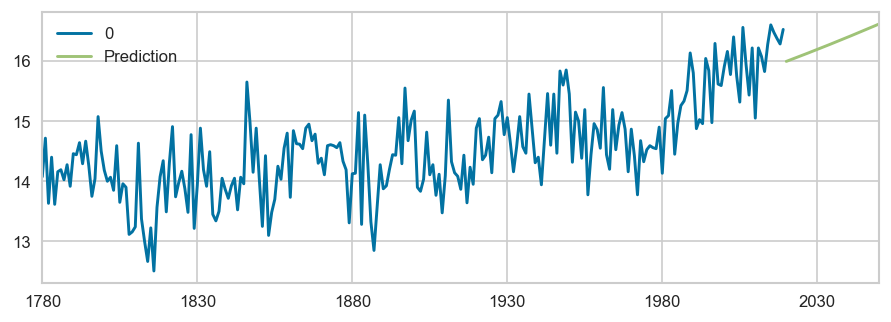

In [30]:

plot_0=pd.concat([year_avg_t.Temperatura,future_forecast_def],axis=0)

plot_0.plot()


In [31]:
plot_0

,0,Prediction
1780,14.075000,NaN
1781,14.716667,NaN
1782,13.633333,NaN
1783,14.400000,NaN
1784,13.616667,NaN
1785,14.158333,NaN
1786,14.191667,NaN
1787,14.025000,NaN
1788,14.275000,NaN
1789,13.916667,NaN


In [32]:
cond = year_avg_t.index == 1786


# calculate value to subtract
first = year_avg_t['Temperatura'].where(cond).ffill().mask(cond)


# perform calculation
year_inclination= (year_avg_t['Temperatura'] + 0.08) 


In [33]:
print(year_inclination.tail(10))
print(year_avg_t.Temperatura.head(10))

Any
2010    15.130000
2011    16.296667
2012    16.155000
2013    15.905000
2014    16.355000
2015    16.680000
2016    16.555000
2017    16.455000
2018    16.363333
2019    16.605000
Name: Temperatura, dtype: float64
Any
1780    14.075000
1781    14.716667
1782    13.633333
1783    14.400000
1784    13.616667
1785    14.158333
1786    14.191667
1787    14.025000
1788    14.275000
1789    13.916667
Name: Temperatura, dtype: float64


In [39]:
plot_0.tail(50)

,0,Prediction
2001,16.158333,NaN
2002,15.775000,NaN
2003,16.400000,NaN
2004,15.750000,NaN
2005,15.316667,NaN
2006,16.558333,NaN
2007,15.950000,NaN
2008,15.433333,NaN
2009,16.216667,NaN
2010,15.050000,NaN
